<a href="https://colab.research.google.com/github/RAVIKUMARBALIJA/tensorflow2_tutorials/blob/main/tensorflow2_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [29]:
from matplotlib.cm import binary
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

In [10]:
mnist=tf.keras.datasets.mnist

In [13]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [40]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [41]:
x_train[0,:].shape

(28, 28)

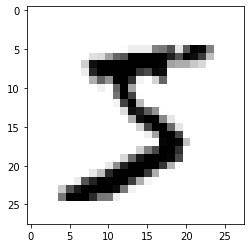

In [42]:
plt.imshow(x_train[0,:],interpolation='nearest',cmap='binary')

In [43]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [45]:
predictions=model(x_train[:1]).numpy()
predictions

array([[-0.14103152,  0.01738916, -0.25972188,  0.4337097 , -0.39042705,
         0.5269252 ,  0.3504078 ,  0.3696224 , -0.11065096,  0.4252966 ]],
      dtype=float32)

In [46]:
np.argmax(tf.nn.softmax(predictions).numpy())

5

In [47]:
loss_func=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [48]:
loss_func(y_train[:1],predictions).numpy()

1.9464868

In [49]:
model.compile(optimizer=Adam(),loss=loss_func,metrics=['accuracy'])

In [51]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1407 - accuracy: 0.9578
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9679
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9735
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9767
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9795
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9813
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9826
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0449 - accuracy: 0.9855
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9861
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.038

In [52]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9813


[0.07774949818849564, 0.9812999963760376]

In [53]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [60]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[3.4357944e-13, 2.3932495e-15, 2.1701143e-12, 7.1333983e-07,
        8.2528802e-17, 2.5014610e-09, 4.2661976e-24, 9.9999797e-01,
        7.6591435e-11, 1.3244521e-06]], dtype=float32)>

In [61]:
np.argmax(probability_model(x_test[:1]))

7

In [58]:
np.argmax(model.predict(x_test[:1]))

7

In [59]:
model.predict(x_test[:1])

array([[-14.744817  , -19.71158   , -12.901699  ,  -0.19876575,
        -23.078842  ,  -5.8518476 , -39.856777  ,  13.95454   ,
         -9.337994  ,   0.4200307 ]], dtype=float32)

In [63]:
model(x_test[:1]).numpy()

array([[-14.744817  , -19.71158   , -12.901699  ,  -0.19876575,
        -23.078842  ,  -5.8518476 , -39.856777  ,  13.95454   ,
         -9.337994  ,   0.4200307 ]], dtype=float32)

In [64]:
model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-14.744817  , -19.71158   , -12.901699  ,  -0.19876575,
        -23.078842  ,  -5.8518476 , -39.856777  ,  13.95454   ,
         -9.337994  ,   0.4200307 ]], dtype=float32)>